<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Authors: Zhihui Li and Kevin Messali</center>
<br>
<center><i>Approximation of periodic functions</i></center>

# Approximation of periodic functions

&nbsp;

In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.linalg import solve as l_solve
import matplotlib.pyplot as plt
import datetime as dt
import scipy.fftpack as fftpack

In [32]:
# please execute to have CSS styling
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()

## 1.2 Suggestions of directions to explore
- You can consider simple 2π-periodic even functions, for instance piece-wise constant or piece-wise linear functions like f and g defined on (−π, π] by

- $ f(x) = \begin{cases} 1 & \mbox{if } x \in [−\frac{\pi}{2}, \frac{\pi}{2}]
\\ -1 & \mbox{otherwise} \end{cases} $

- Because $ f $ is an even function, we know $ b_n(f)=0 $ and $ a_n(f)= \frac{1}{\pi} \int_{0}^{\pi} f(x) cos(nx)dx $

  - In this case, we use Chasles identity to break the interval to $[0, \frac{\pi}{2})$, $[\frac{\pi}{2}, {\pi}]$

  - $ a_n(f)= \frac{1}{\pi} \int_{0}^{\frac{\pi}{2}} cos(nx)dx - 
  \frac{1}{\pi} \int_{\frac{\pi}{2}}^{\pi} cos(nx)dx $

  - $ a_n(f)= \frac{1}{n\pi} (\sin( \frac{n\pi}{2} )) +  \frac{1}{n\pi} (\sin( \frac{n\pi}{2} )) = \frac{2}{n\pi} 
  (\sin( \frac{n\pi}{2} ))$
  
  - and if $n=0$, $a_n(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)cos(0) dx = 0$ 

  - and if $n=1$, $a_n(f) = \frac{2}{\pi} $ 

  - and if $n \to \infty$, $ a_n(f)= \lim_{n \to \infty} \frac{2}{n\pi} 
  (\sin( \frac{n\pi}{2} )) = 0 $ 

- Check numerically how the associated truncated Fourier series approximate $ f $

  - $S(f)(x) = a_0(f) + 2\sum_{n=1}^{\infty} a_n(f) \cos(nx)$
  - See the plot below (titled "$f$ versus $f_{truncated}$")
  - We observe that $f_{truncated}$ approximates f with relatively big error on the discontinuous points: (when $x\in \{ {-\frac{\pi}{2}, \frac{\pi}{2} } \}$, the error is big )

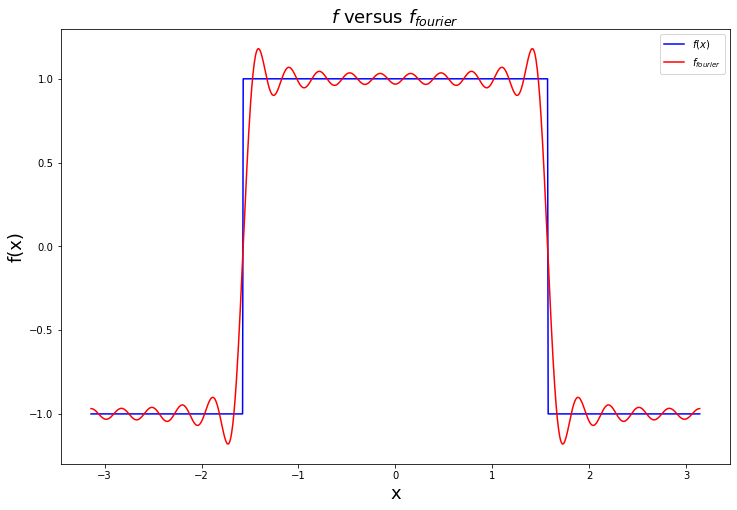

an_f1(0): 0
an_f1(1): 0.6366197723675814
an_f1(2): 3.8981718325193755e-17
an_f1(3): -0.2122065907891938
an_f1(4): -3.8981718325193755e-17
an_f1(5): 0.12732395447351627
an_f1(6): 3.8981718325193755e-17
an_f1(7): -0.09094568176679733
an_f1(8): -3.8981718325193755e-17
an_f1(9): 0.0707355302630646
bn_f1(0): 0
bn_f1(1): 0
bn_f1(2): 0
bn_f1(3): 0
bn_f1(4): 0
bn_f1(5): 0
bn_f1(6): 0
bn_f1(7): 0
bn_f1(8): 0
bn_f1(9): 0


In [4]:

def f(x):
    """
    Definition of f:
    f(x) = 1 if x belongs to [-pi/2, pi/2] and f(x) = -1 otherwise.
    """
    return 1 if -np.pi/2 <= x <= np.pi/2 else -1

# plot truncated series of f(x)
def an_f1(n):
    """
    We get a convergence for the coefficient a_n as n tends to infinity to 0 by trigonometric limits of the form sin(x)/x as x tends to infinity.
    """
    return 0 if n==0 else 2*np.sin(n * np.pi /2 ) / (n*np.pi) 


def bn_f1(n):
    """
    Since f is an even function, by remark 1.2 b_n is 0.
    """
    return 0


def S_f(x, N):
    """
    bn_f1 vanishes
    N: stopping for infinite series
    """
    temp = 0
    for n in range(N):
        temp += 2*an_f1(n)*np.cos(n*x)
    return temp

# plot f(x) with 1000 equidistant points
tab_x = np.linspace(-np.pi, np.pi, 1001)
y = [f(x) for x in tab_x]

plt.figure(figsize = (12,8))
plt.plot(tab_x, y, color="blue", label='$f(x)$')
plt.xlabel('x', fontsize = 18)
plt.ylabel('f(x)', fontsize = 18)
plt.title('$f$ versus $f_{fourier}$', fontsize = 18)

# plot f_fourier(x) with 1000 equidistant points
N = 20 # N is the stopping number for the infinite sum, larger the better 
truncated_f = S_f(tab_x, N)
plt.plot(tab_x, truncated_f, color="red", label='$f_{fourier}$')
plt.legend(loc='upper right')
plt.show()


# study the decay of a_n and b_n for f(x)
n = 10
for i in range(n):
    print(f'an_f1({i}): {an_f1(i)}') # Convergent to 0

for i in range(n):
    print(f'bn_f1({i}): {bn_f1(i)}')  # Getting 0 as expected because f is even

-  $g(x) = 1 − \frac{2\vert x \vert}{\pi}$ ,

- Because $ g $ is an even function, we know $ b_n(g)=0 $ and $ a_n(g)= \frac{1}{\pi} \int_{0}^{\pi} g(x) cos(nx)dx $

  - In this case, $ a_n(g)= \frac{1}{\pi} \int_{0}^{\pi} (1 - \frac{2|x|}{\pi})  \cos(nx)dx $
  
  - After calculation, we found the anti-derivative is $\frac{-n\pi \sin(n\pi) - 2\cos(n\pi) + 2}{n^2\pi} $
  - So $ a_n(g)= \frac{-n\pi \sin(n\pi) - 2\cos(n\pi) + 2}
  {n^2\pi^2} $

  - and if $n=0$, $a_n(g) = \frac{1}{2\pi} \int_{-\pi}^{\pi} g(x)cos(0) dx = 0$ because the area is zero.


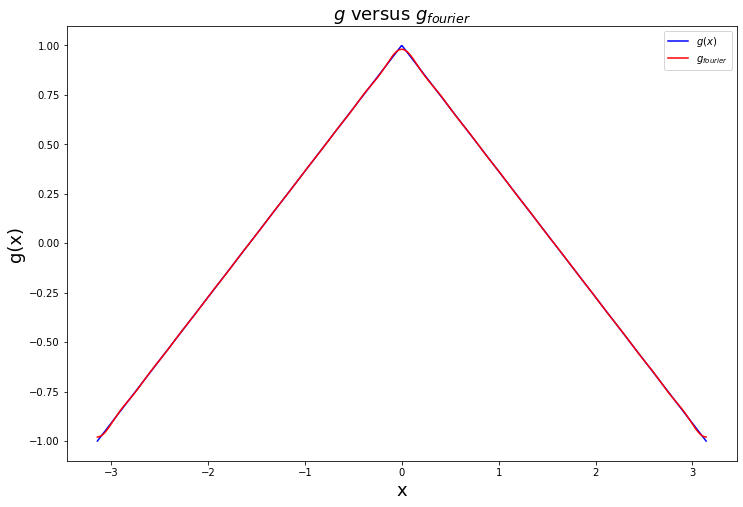

an_f2(0): 0
an_f2(1): 0.40528473456935105
an_f2(2): 3.937118883669901e-17
an_f2(3): 0.0450316371743723
an_f2(4): 3.937118883669901e-17
an_f2(5): 0.016211389382774003
an_f2(6): 3.8746249331354586e-17
an_f2(7): 0.008271117032027535
an_f2(8): 3.9019660364942773e-17
an_f2(9): 0.005003515241596888
bn_f2(0): 0
bn_f2(1): 0
bn_f2(2): 0
bn_f2(3): 0
bn_f2(4): 0
bn_f2(5): 0
bn_f2(6): 0
bn_f2(7): 0
bn_f2(8): 0
bn_f2(9): 0


In [7]:

def g(x):
    """
    Definition of g: 
    g is a 2-pi periodic even function on (-pi, pi] 
    g(x) = 1 - (2 * abs(x)/pi)
    """
    return 1 - (2*(np.abs(x)/np.pi))


def an_f2(n):
    """
    We get a convergence for the coefficient a_n as n tends to infinity to 0.
    """
    return (-n*np.pi*np.sin(n*np.pi) - 2*np.cos(n*np.pi) + 2) / (np.pi**2 * n**2) if n!=0 else 0


def bn_f2(n):
    """
    Since g is an even function, by remark 1.2 b_n is 0.
    """
    return 0

def S_f2(x, N):
    """
    bn_f1 vanishes
    N: stopping for infinite series
    """
    temp = 0
    for n in range(N):
        temp += 2*an_f2(n)*np.cos(n*x)
    return temp

# plot g(x) with 1000 equidistant points
X = np.linspace(-np.pi, np.pi, 1000)
plt.figure(figsize = (12,8))
plt.plot(X, g(X), color="blue", label='$g(x)$')
plt.xlabel('x', fontsize = 18)
plt.ylabel('g(x)', fontsize = 18)
plt.title('$g$ versus $g_{fourier}$', fontsize = 18)

# plot g_fourier(x) with 1000 equidistant points
N = 20 # N is the stopping number for the infinite sum, larger the better 
truncated_g = S_f2(X, N)
plt.plot(X, truncated_g, color="red", label='$g_{fourier}$')
plt.legend(loc='upper right')
plt.show()

# study the decay of a_n and b_n for g(x)
n = 10
for i in range(n):
    print(f'an_f2({i}): {an_f2(i)}') # Convergent to 0

for i in range(n):
    print(f'bn_f2({i}): {bn_f2(i)}')  # Getting 0 as expected because g is even

## Dealing with more complicated functions
- implementation of general Fourier series by scipy.integrate.quad

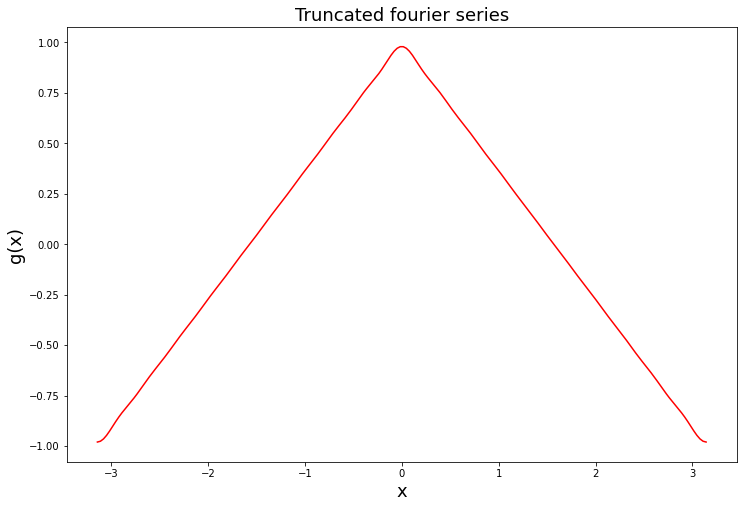

In [8]:

def g(x):
    """
    You can type in (or override) any function here:
    Try uncomment the following #return np.sin(x)/x
    """
    #return np.sin(x)/x if x!=0 else 1
    return 1 - (2*(np.abs(x)/np.pi))
    
def an_f(f, n):
    """
    We used scipy.integrate to calculate the integral
    scipy.integrate() returns a tuple,
    where the first element holding the estimated value of the integral
    and the second element holding an upper bound on the error
    """
    subresult = integrate.quad(lambda x: f(x)*np.cos(n*x), -np.pi, np.pi)[0]
    return (1/(2*np.pi))*subresult

def bn_f(f, n):
    """
    We used scipy.integrate to calculate the integral
    scipy.integrate() returns a tuple,
    where the first element holding the estimated value of the integral
    and the second element holding an upper bound on the error
    """
    subresult = integrate.quad(lambda x: f(x)*np.sin(n*x), -np.pi, np.pi)[0]
    return (1/(2*np.pi))*subresult


def truncated_fourier_series(f, x, N):
    """
    temp: variable used to store the truncated sum
    range(1,n): compute sum from n=1 to n=N-1
    """
    a_0 = an_f(f, 0)
    temp = a_0
    for i in range(1,N):
        a_i = an_f(f, i)
        b_i = bn_f(f, i)
        temp += 2*(a_i*np.cos(i*x) + b_i*np.sin(i*x))
    return temp

X = np.linspace(-np.pi, np.pi, 200)
N = 20 # N is the stopping number for the infinite sum, larger the better 
plt.figure(figsize = (12,8))
plt.plot(X, truncated_fourier_series(g, X, N), color="red")
plt.xlabel('x', fontsize = 18)
plt.ylabel('g(x)', fontsize = 18)
plt.title('Truncated fourier series', fontsize = 18)
plt.show()

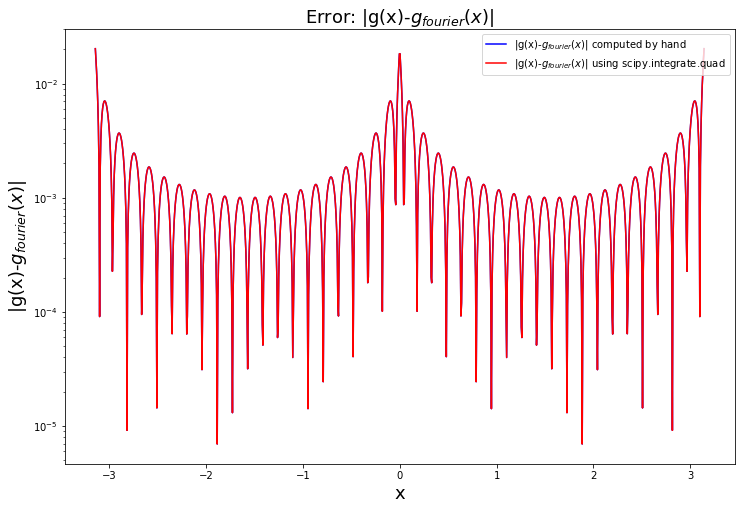

In [9]:
tab_x = np.linspace(-np.pi, np.pi, 1000)

N = 20 # N is the stopping number for the infinite sum, larger the better 
tab_err0 = np.abs( g(tab_x) - S_f2(tab_x, N) )
tab_err1 = np.abs( g(tab_x) - truncated_fourier_series(g, tab_x, N) )

plt.figure(figsize = (12,8))
plt.plot(tab_x, tab_err0, label='|g(x)-$g_{fourier}(x)$| computed by hand', color='blue')
plt.plot(tab_x, tab_err1, label='|g(x)-$g_{fourier}(x)$| using scipy.integrate.quad', color='red')
# both plot overlaps, it's normal that you didn't see the blue plot
plt.xlabel('x', fontsize = 18)
plt.yscale("log")
plt.ylabel('|g(x)-$g_{fourier}(x)$|', fontsize = 18)
plt.title('Error: |g(x)-$g_{fourier}(x)$|', fontsize = 18)
plt.legend(loc='upper right')
plt.show()

Check numerically how the associated truncated Fourier series approximate $ g $

- It approximate g has relatively big error on the edges $x\in \{-\pi, \pi \}$ and on $x=0$

### Study of decay of the Fourier coefficients (the rate at which they go to 0)

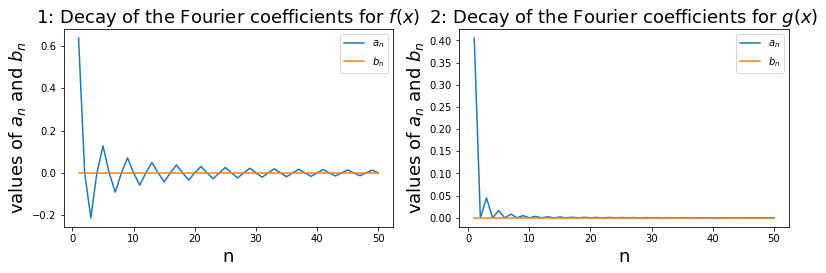

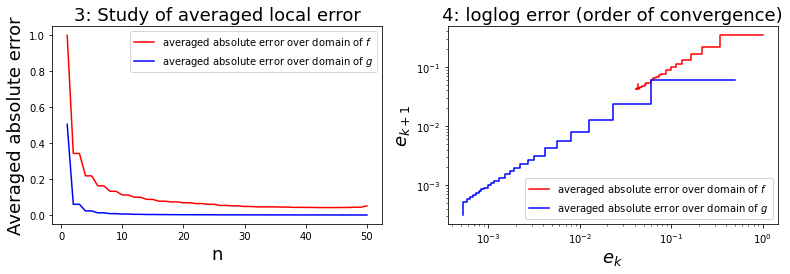

In [27]:
n = 51
N = np.arange(1, n) # N is the list containing n (from 1 to 50)
X = np.linspace(-np.pi, np.pi, 101) # 100 equidistant points from -pi to pi
a_n_f_val = list()
b_n_f_val = list()

a_n_g_val = list()
b_n_g_val = list()

error_n_f = list()
error_n_g = list()

# computing values of f using X (100 equidistant points from -pi to pi)
f_val = [f(x) for x in X]


for i in N:
    a_n_f_val.append(an_f1(i))
    b_n_f_val.append(bn_f1(i))
    a_n_g_val.append(an_f2(i))
    b_n_g_val.append(bn_f2(i))
    error_n_f.append( np.average(np.abs(f_val-S_f(X, i))) )
    error_n_g.append( np.average(np.abs(g(X)-S_f2(X, i))) )
    # error_n.append(integrate.quad(lambda x: g(x) - truncated_fourier_series(g, x, i), -np.pi, np.pi)[0]) 
    

# studying f
plt.figure(figsize = (13,8))
plt.subplot(221)
plt.plot(N, a_n_f_val, label='$a_n$')
plt.plot(N, b_n_f_val, label='$b_n$')
plt.xlabel('n', fontsize = 18)
plt.ylabel('values of $a_n$ and $b_n$', fontsize = 18)
plt.legend(loc='upper right')
plt.title('1: Decay of the Fourier coefficients for $f(x)$', fontsize = 18)

# studying g
plt.subplot(222)
plt.plot(N, a_n_g_val, label='$a_n$')
plt.plot(N, b_n_g_val, label='$b_n$')
plt.xlabel('n', fontsize = 18)
plt.ylabel('values of $a_n$ and $b_n$', fontsize = 18)
plt.legend(loc='upper right')
plt.title('2: Decay of the Fourier coefficients for $g(x)$', fontsize = 18)
plt.show()

# studying error of f,g
plt.figure(figsize = (13,8))
plt.subplot(221)
plt.plot(N, error_n_f, label='averaged absolute error over domain of $f$', color='red')
plt.plot(N, error_n_g, label='averaged absolute error over domain of $g$', color='blue')
plt.xlabel('n', fontsize = 18)
plt.ylabel('Averaged absolute error', fontsize = 18)
plt.legend(loc='upper right')
plt.title('3: Study of averaged local error', fontsize = 18)

# studying loglog scale
plt.subplot(222)
plt.loglog(error_n_f[:-1], error_n_f[1:], label='averaged absolute error over domain of $f$', color='red')
plt.loglog(error_n_g[:-1], error_n_g[1:], label='averaged absolute error over domain of $g$', color='blue')
plt.xlabel('$e_{k}$', fontsize = 18)
plt.ylabel('$e_{k+1}$', fontsize = 18)
plt.legend(loc='lower right')
plt.title('4: loglog error (order of convergence)', fontsize = 18)
plt.show()

# polyfit
# print( np.polyfit( np.log(error_n_f[:-1]), np.log(error_n_f[1:]), 1  ) )
# print( np.polyfit( np.log(error_n_g[:-1]), np.log(error_n_g[1:]), 1  ) )

We see a direct link between the decay of the coefficients and the error:
- The link is that the **faster** the coefficient decays to 0 (compare plot1,2 above: $g$'s coefficient decay faster), the **smaller** the error between the function and the truncated Fourier series (compare error plot3 above: we see error of $g$ is smaller). This can be explained by the definition of truncated Fourier series:
  - if the coefficient decays to 0, this means the current term of the sum decays to 0, which means the error between the truncated Fourier series and the origional function tends to 0.
  - Sidenote: because it's using the same algorithm (namely Fourier series interpolation), the order of convergence is the same, as demonstrated on plot4 (loglog scale between $e_{k+1}$ vs $e_{k}$), where the slopes are the same.
- For function that are NOT 2$\pi$-periodic we
observe that their coefficients converge slower and that the error takes more time to get to 0.
- We observe that for very smooth functions, we have a very fast decay of the coefficients and therefore also the error.

# Section 2: Trigonometric interpolation
## 2.2 Suggestions of directions to explore

$A\hat{f}=f(X)$ where 
$A = \begin{pmatrix}
1 & 2\cos(1\times x_0) & ... & 2\cos((N-1)x_0)\\
1 & 2\cos(1\times x_1) & ... & 2\cos((N-1)x_1)\\
1 & \vdots & \vdots & \vdots \\
1 & 2\cos(1\times x_{N-1}) & ... & 2\cos((N-1)x_{N-1})\\
\end{pmatrix}$

$\hat{f} = 
\begin{align}
\begin{pmatrix}
           \hat{f_0} \\
           \hat{f_1} \\
           \vdots \\
           \hat{f_{N-1}}
\end{pmatrix}
\end{align}$


$\hat{f(X)} = 
\begin{align}
\begin{pmatrix}
           f(X_0) \\
           f(X_1) \\
           \vdots \\
           f(X_{N-1})
\end{pmatrix}
\end{align}$

0:00:00.008704


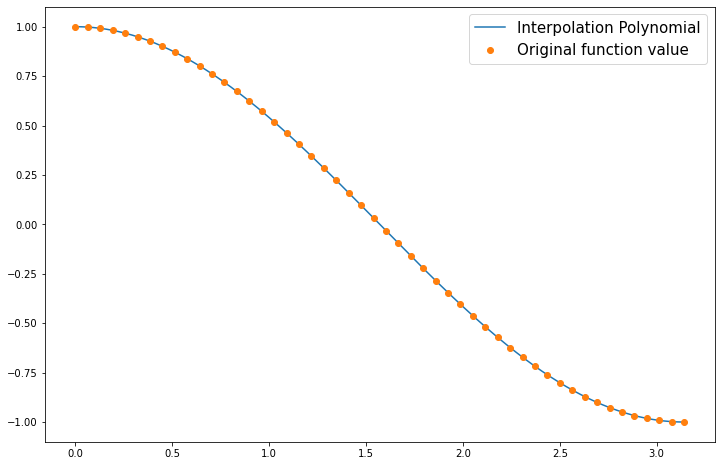

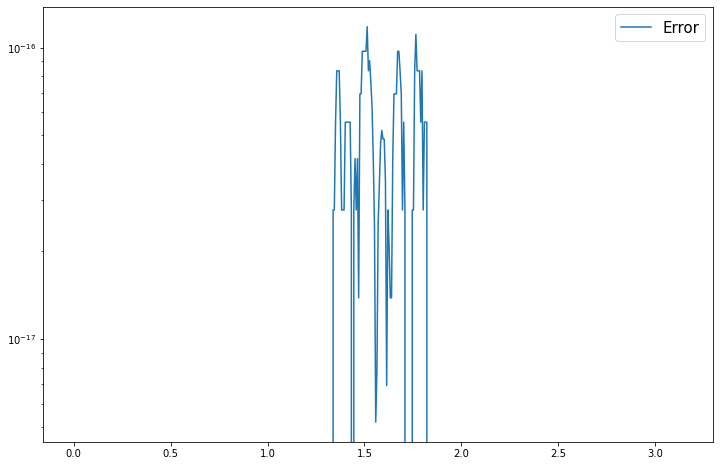

In [15]:
N = 50

def X_k(N):
    """
    Generate sequence X
    k is an array from 0,...,N−1
    N is the ending-point
    output: range [π/2N, π-π/2N] where each element is cos(X_k)
    """
    k = np.arange(0, N)
    return (2*k + 1) * np.pi / (2 * N)

def genA(X):
    """
    Generate coefficient matrix A
    Input: X is an array containing x0, x1, ..., x_(N-1)
    """
    final_matrix = []
    for x_i in X:
        subresult = [1]
        for n in range(1, len(X)):
            subresult.append( 2*np.cos(n*x_i) )
        final_matrix.append(subresult)
    return final_matrix

def f1(X):
    return X**2

def f2(X):
    return np.cos(X)

def f3(X):
    return np.abs(X)

def evalPN(f_hat,X):
    """
    Inputs: 
    a : the coefficients of the polynomial P in the monomial basis 
    X : an array of values at which we want to evaluate P 
    
    Output: 
    an array containing the values P_N(x) for each x in X
    """
    result = f_hat[0]
    for i in range(1, len(f_hat)):
        result += 2 * f_hat[i] * np.cos(i*X)
    return result

start = dt.datetime.now()

f_hat = l_solve(genA(X_k(N)), f2(X_k(N)))
tab_n = np.linspace(0, np.pi, 50)   # 50 points (original function)
tab_X = np.linspace(0, np.pi, 501) # 501 points (interpolation polynomial)
PX = evalPN(f_hat, tab_X)

print(dt.datetime.now() - start)

# plot
plt.figure(figsize = (12,8))
plt.plot(tab_X, PX, label="Interpolation Polynomial")
plt.plot(tab_n, f2(tab_n), 'o', label="Original function value")
plt.legend(fontsize = 15)
plt.show()

# error
plt.figure(figsize = (12,8))
plt.plot(tab_X, abs(PX - f2(tab_X)), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()

### Other functions

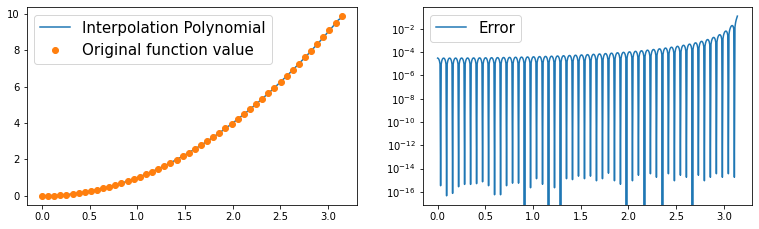

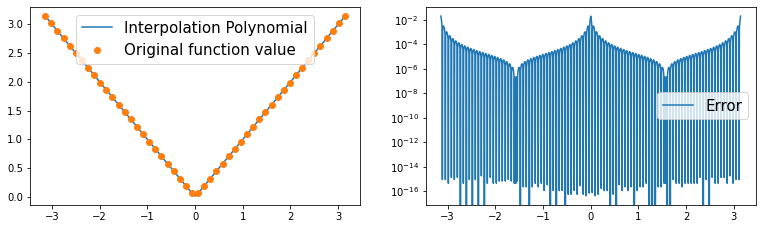

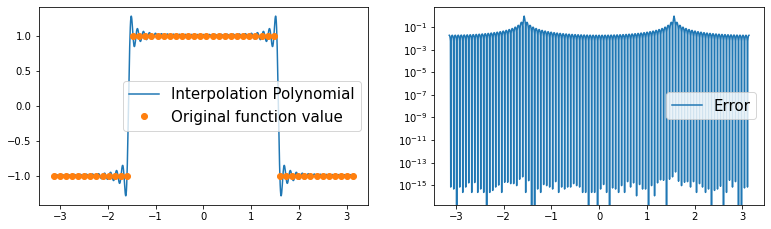

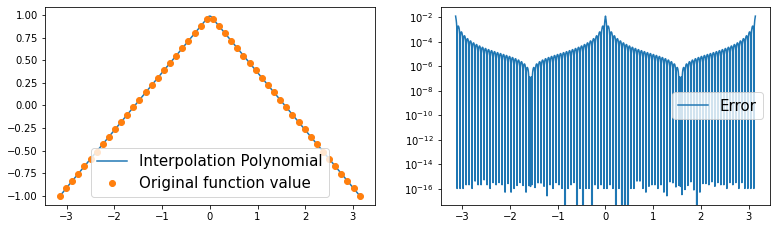

In [17]:
# (function f from first section)
def f(x):
    return 1 if -np.pi/2 <= x <= np.pi/2 else -1

# (function g from first section)
def g(x):
    return 1 - (2*(np.abs(x)/np.pi))


f_images = [f(x) for x in X_k(N)] # N points


f_hat_f_1 = l_solve(genA(X_k(N)), f1(X_k(N)))
f_hat_f_3 = l_solve(genA(X_k(N)), f3(X_k(N)))
f_hat_f = l_solve(genA(X_k(N)), f_images)
f_hat_g = l_solve(genA(X_k(N)), g(X_k(N)))



tab_n = np.linspace(0, np.pi, 50)   # 50 points (original function)
tab_n_2 = np.linspace(-np.pi, np.pi, 50)   # 50 points (original function)
tab_X = np.linspace(0, np.pi, 501) # 501 points (interpolation polynomial)
tab_X2 = np.linspace(-np.pi, np.pi, 1001) # Points for first section functions
PX_f_1 = evalPN(f_hat_f_1, tab_X)
PX_f_3 = evalPN(f_hat_f_3, tab_X2)
PX_f = evalPN(f_hat_f, tab_X2)
PX_g = evalPN(f_hat_g, tab_X2)


# plot f_1
plt.figure(figsize = (13,8))

plt.subplot(221)
plt.plot(tab_X, PX_f_1, label="Interpolation Polynomial")
plt.plot(tab_n, f1(tab_n), 'o', label="Original function value")
plt.legend(fontsize = 15)

plt.subplot(222)
plt.plot(tab_X, abs(f1(tab_X) - PX_f_1), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()


# plot f_3
plt.figure(figsize = (13,8))

plt.subplot(221)
plt.plot(tab_X2, PX_f_3, label="Interpolation Polynomial")
plt.plot(tab_n_2, f3(tab_n_2), 'o', label="Original function value")
plt.legend(fontsize = 15)

plt.subplot(222)
plt.plot(tab_X2, abs(f3(tab_X2) - PX_f_3), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()

# plot f (first section function)
plt.figure(figsize = (13,8))

plt.subplot(221)
plt.plot(tab_X2, PX_f, label="Interpolation Polynomial")
plt.plot(tab_n_2, [f(x) for x in tab_n_2], 'o', label="Original function value")
plt.legend(fontsize = 15)

plt.subplot(222)
plt.plot(tab_X2, abs([f(x) for x in tab_X2] - PX_f), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()

# plot g (first section function)
plt.figure(figsize = (13,8))

plt.subplot(221)
plt.plot(tab_X2, PX_g, label="Interpolation Polynomial")
plt.plot(tab_n_2, g(tab_n_2), 'o', label="Original function value")
plt.legend(fontsize = 15)

plt.subplot(222)
plt.plot(tab_X2, abs(g(tab_X2) - PX_g), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()


## Inverse of A
$B = \frac{1}{N} \begin{pmatrix}
\cos(0X_0) & ... & \cos(0X_{N-1}) \\
\vdots & cos(iX_j) & \vdots \\
\cos((N-1) X_0) & ... & \cos((N-1) X_{N-1}) \\
\end{pmatrix}$


In [18]:

def genB(X):
    """
    Generate coefficient matrix B
    Input: X is an array containing x0, x1, ..., x_(N-1)
    """
    N = len(X)
    final_matrix = []
    for n in range(0, len(X)):
        subresult = []
        for x_i in X:
            subresult.append( np.cos(n * x_i) / N )
        final_matrix.append(subresult)
    return final_matrix


# Test
A = genA(X_k(4))
B = genB(X_k(4))
print(np.matmul(B, A))

# due to rounding we see a diagonal matrix

[[ 1.00000000e+00  5.55111512e-17 -5.55111512e-17 -1.11022302e-16]
 [ 2.77555756e-17  1.00000000e+00  5.55111512e-17  9.37720122e-17]
 [-2.77555756e-17  5.55111512e-17  1.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  9.37720122e-17  0.00000000e+00  1.00000000e+00]]


- We observe the result of multiplication of A and B has the diagnoal line close to 1 and everything else close to 0, this is because of rounding error.
- Due to rounding error, our matrix B has some deviations from the real value (for example $\frac{ \cos(n * x_i) } {N}$ is a float point number that's not exact.
- And during the matrix multiplication, there's floating-number multiplication and floating-number sum, which gives an extra source of rounding error.

## Study difference between  $\hat{f}$ and $a_n(f)$

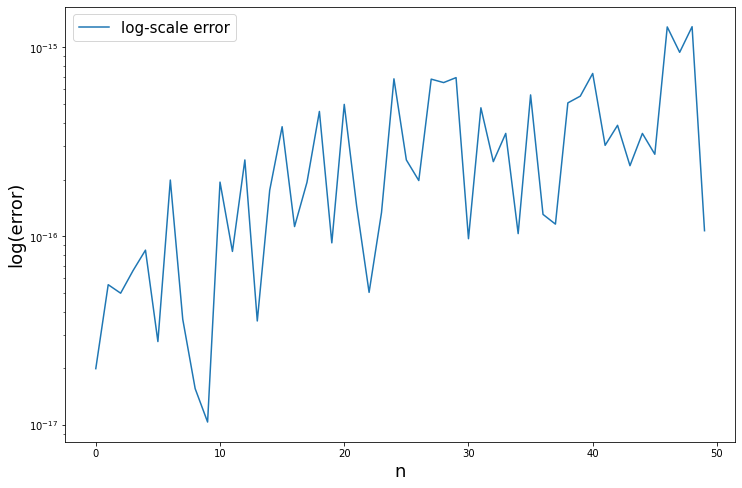

In [20]:
def f(x):
    return np.cos(x)

a_n = [an_f(f, n) for n in range(N)]
X = X_k(N)
B = genB(X)
f_hat = np.matmul(B, f(X))
err = abs(a_n - f_hat)

# plot
tab_n = np.arange(N)
plt.figure(figsize = (12,8))
plt.plot(tab_n, err, label="log-scale error")
plt.legend(fontsize = 15)
plt.yscale('log')
plt.xlabel('n', fontsize = 18)
plt.ylabel('log(error)', fontsize = 18)
plt.show()

# plot err_k+1 vs err_k
# plt.figure(figsize = (12,8))
# plt.plot(err[1:], err[:-1], label="log-scale error")
# plt.xlabel('$e_k$', fontsize = 18)
# plt.ylabel('$e_{k+1}$', fontsize = 18)

- We observed that $a_n$ converges to $\hat{f}$, so we conclude that $\hat{f_i}= a_i(f), \forall i \in [0, N-1]$ using that $\hat{f} = Bf(X)$

##  Another way to compute $\hat{f}$ by using scipy.fftpack($f$)

0:00:00.000914


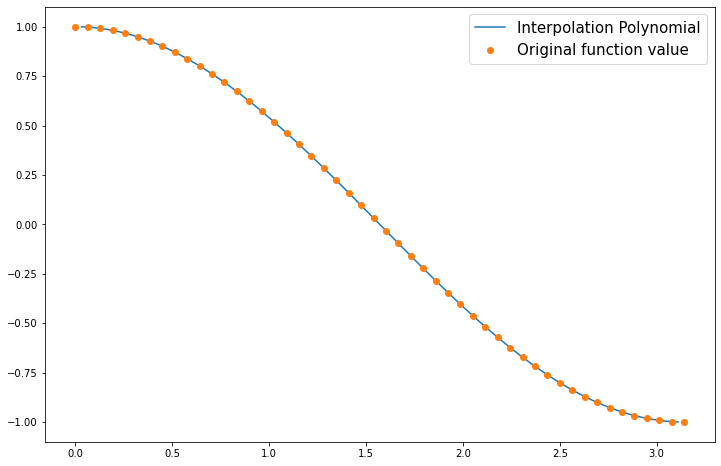

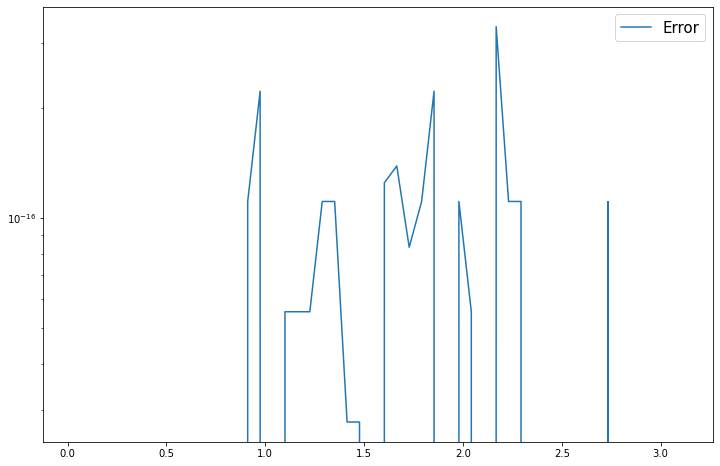

In [21]:
import scipy.fftpack as fftpack

N = 50

X = X_k(N)
f_2 = [f2(x) for x in X] # N points

start = dt.datetime.now()

f_hat = fftpack.dct(f_2)
tab_n = np.linspace(0, np.pi, N)   # 50 points (original function)
PX = evalPN(f_hat, X)/(2*N) # actually differ by a factor 1/2N

print(dt.datetime.now() - start)

# plot
plt.figure(figsize = (12,8))
plt.plot(X, PX, label="Interpolation Polynomial")
plt.plot(tab_n, f2(tab_n), 'o', label="Original function value")
plt.legend(fontsize = 15)
plt.show()

plt.figure(figsize = (12,8))
plt.plot(X, abs(f2(X) - PX), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()

### Other functions:

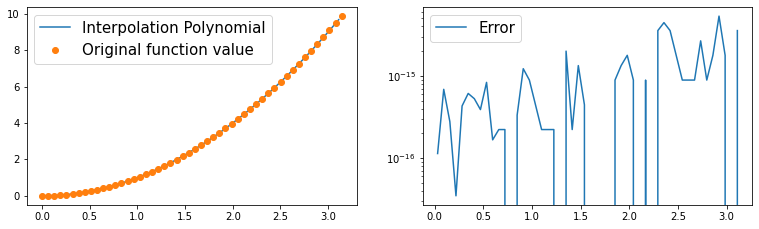

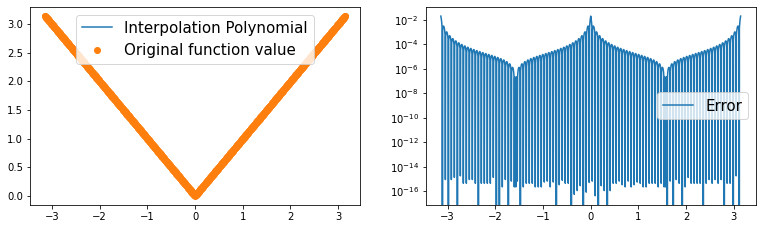

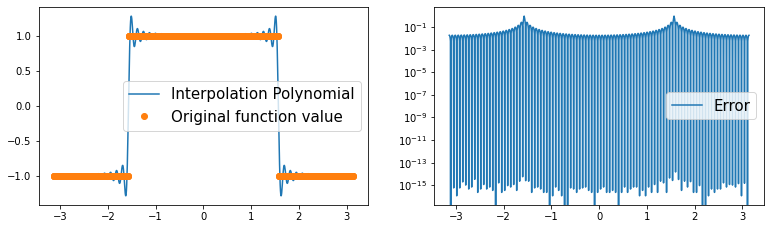

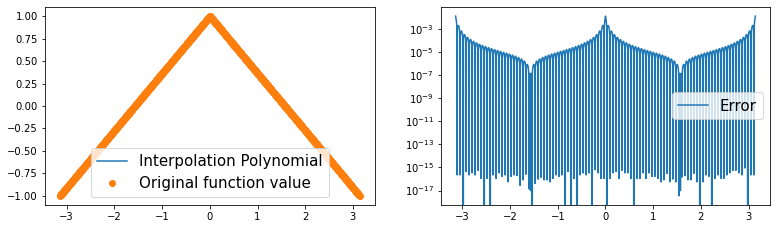

In [22]:
N = 50
X = X_k(N)
tab_n = np.linspace(0, np.pi, N)   # 50 points (original function)
tab_n_2 = np.linspace(-np.pi, np.pi, 1001)   # points (for function of first section)


# (function f from first section)
def f(x):
    return 1 if -np.pi/2 <= x <= np.pi/2 else -1

# (function g from first section)
def g(x):
    return 1 - (2*(np.abs(x)/np.pi))



f_1 = [f1(x) for x in X] # N points
f_3 = [f3(x) for x in X] # N points
f_images = [f(x) for x in X] # N points
g_images = [g(x) for x in X] # N points


f_hat_f_1 = fftpack.dct(f_1)
f_hat_f_3 = fftpack.dct(f_3)
f_hat_f = fftpack.dct(f_images)
f_hat_g = fftpack.dct(g_images)


PX_f_1 = evalPN(f_hat_f_1, X)/(2*N) # actually differ by a factor 1/2N
PX_f_3 = evalPN(f_hat_f_3, tab_n_2)/(2*N) # actually differ by a factor 1/2N
PX_f = evalPN(f_hat_f, tab_n_2)/(2*N) # actually differ by a factor 1/2N
PX_g = evalPN(f_hat_g, tab_n_2)/(2*N) # actually differ by a factor 1/2N


# plot f_1
plt.figure(figsize = (13,8))

plt.subplot(221)
plt.plot(X, PX_f_1, label="Interpolation Polynomial")
plt.plot(tab_n, f1(tab_n), 'o', label="Original function value")
plt.legend(fontsize = 15)

plt.subplot(222)
plt.plot(X, abs(f1(X) - PX_f_1), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()

# plot f_3
plt.figure(figsize = (13,8))

plt.subplot(221)
plt.plot(tab_n_2, PX_f_3, label="Interpolation Polynomial")
plt.plot(tab_n_2, f3(tab_n_2), 'o', label="Original function value")
plt.legend(fontsize = 15)

plt.subplot(222)
plt.plot(tab_n_2, abs(f3(tab_n_2) - PX_f_3), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()

# plot f (function from first section)
plt.figure(figsize = (13,8))

plt.subplot(221)
plt.plot(tab_n_2, PX_f, label="Interpolation Polynomial")
plt.plot(tab_n_2, [f(x) for x in tab_n_2], 'o', label="Original function value")
plt.legend(fontsize = 15)

plt.subplot(222)
plt.plot(tab_n_2, abs([f(x) for x in tab_n_2] - PX_f), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()

# plot g (function from first section)
plt.figure(figsize = (13,8))

plt.subplot(221)
plt.plot(tab_n_2, PX_g, label="Interpolation Polynomial")
plt.plot(tab_n_2, g(tab_n_2), 'o', label="Original function value")
plt.legend(fontsize = 15)


plt.subplot(222)
plt.plot(tab_n_2, abs(PX_g - g(tab_n_2)), label="Error")
plt.yscale('log')
plt.legend(fontsize = 15)
plt.show()

## timeit

- We observed the first algorithm takes 0:00:00.009 and the second algorithm takes 0:00:00.001, so in this particular case (N=50, $f(x)=\cos(x)$) scipy.fftpack is faster by 800%. 

# 3.1 Solving differential equations
## Solution to Poisson equation
- It makes sense to look at Poisson equation by Fourier series becasue we can represent $f(x)$ by $S(f)(x) = a_0(f) + 2\sum_{n=1}^{\infty} (a_n(f)\cos(nx) + b_n(f)\sin(nx) )$ by previous section, and similarly we can also represent 

    - $u(x)$ by $S(u)(x) = \alpha_0(f) + 2\sum_{n=1}^{\infty} (\alpha_n(u)\cos(nx) + \beta_n(u)\sin(nx) )$, 

    - and derivative is $S(u')(x) = 2\sum_{n=1}^{\infty} (-n\alpha_n(u)\sin(nx) + n\beta_n(u)\cos(nx) )$,

    - and second derivative is: $S(u'')(x) = -2\sum_{n=1}^{\infty} n^2(\alpha_n(u)\cos(nx) + \beta_n(u)\sin(nx) )$, 

    - and $S(-u'')(x) = 2\sum_{n=1}^{\infty} n^2(\alpha_n(u)\cos(nx) + \beta_n(u)\sin(nx) )$ and therefore we get the initial condition $a_0(f)=0$ because $f'(0) = f'(\pi) = 0$, and therefore we can solve for the coefficient of $S(u)(x)$ by setting each $n^2\alpha_n(u) = a_n(f)$ and similarly  $n^2\beta_n(u) = b_n(f)$, where $a_n(f), b_n(f)$ are known, therefore we can solve for $\alpha_n(u), \beta_n(u)$


- using initial condition $u'(0)=u'(\pi)=0$, we get
    - $2\sum_{n=1}^{\infty} (n\beta_n(f)) = 2(\beta_1(f) + 2\beta_2(f) + ... + )= 0 $, 
    - and $2\sum_{n=1}^{\infty} (-n\beta_n(f)) = 2(-\beta_1(f) - 2\beta_2(f) + ... + )= 0 $

- the solution isn't unique because: counterexample, take $f=0$, any solution in the form $u=C_1 x + C_2$,  where $C_1, C_2 \in \mathbb{R}$, so there are multiple solutions.

- compute exact or approximate solutions for $f=\cos(x)$, such that $f'(0) = f'(\pi) = 0$
    - homogenerous solution: $f=0$, $-u''(x)=0$, integrate we get $u'(x)=C_1$, integrate again integrate we get $u_h(x)=C_1 x + C_2$, where $C_1, C_2 \in \mathbb{R}$
    
    - particular solution: $u_p = Asin(x)+Bcos(x)$,  $u_p' = Acos(x)-Bsin(x)$, $u_p'' = -Asin(x)-Bcos(x)$, and $-u'' = Asin(x)+Bcos(x)$, therefore we see A=0, B=1

    - plug-in initial conditions $u'(0)=u'(\pi)=0$ to $u(x) = u_h(x) + u_p(x) = C_1 x + C_2 + \cos(x) $, we get:
        -  $u'(0) = C_1 - sin(0) = 0$, so $C_1 = 0$
        -  $u'(\pi) = C_1 - sin(\pi) = 0$, so $C_1 = 0$
        - so solution is $u(x) = C_2 + \cos(x) $,

## 3.2 Polynomial interpolation


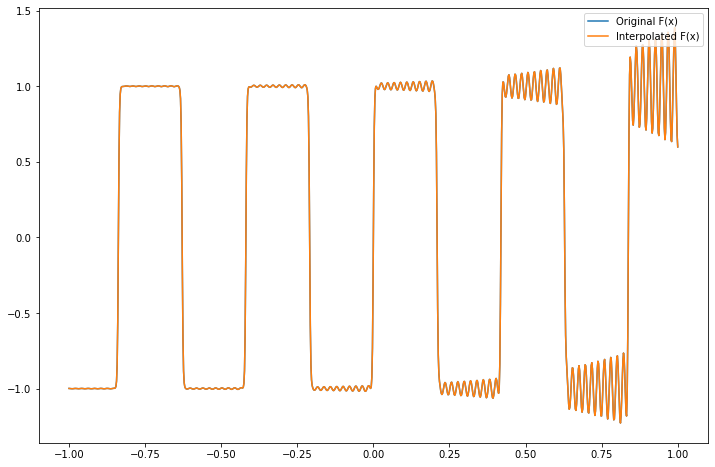

In [23]:
def F(x):
    n=1
    #return 
    return np.tanh(20*np.sin(15*x)) + 0.02*np.exp(3*x)*np.sin(300*x)

def F_cos(X):
    return [F(np.cos(x)) for x in X]


def evalPolywithRoots(x,X):
    """
    Evaluation of a monic polynomial described by its roots.
    """
    PX = 1
    for xk in x:
        PX = PX * (X-xk)
    return PX


N = 10000
tab_x = np.linspace(-1, 1, 1000)

f_hat = fftpack.dct(F_cos(X_k(N)))

PX = evalPN(f_hat, np.arccos(tab_x))/(2*N)



plt.figure(figsize = (12,8))
plt.plot(tab_x, F(tab_x), label='Original F(x)')
plt.plot(tab_x, PX, label='Interpolated F(x)')
plt.legend(loc='upper right')
plt.show()

## Computation of the error

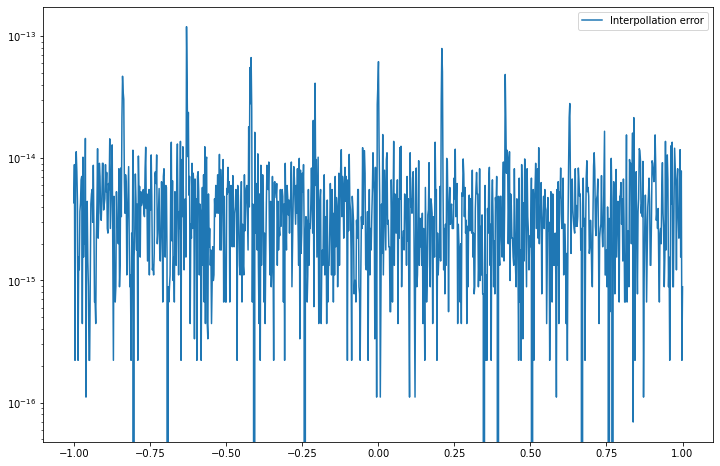

In [24]:
err = abs(PX - F(tab_x))
plt.figure(figsize = (12,8))
plt.plot(tab_x, err, label='Interpollation error')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

One clearly sees that for sufficiently many sampled values, we are able to reconstruct the function $F(x)$, and even other functions as long as we can convert them into a 2-$\pi$-periodic even function. The error is very small which confirms a correct interpollation.